In [1]:
import pandas as pd
import numpy as np

# Load the Wine dataset
wine_data = pd.read_csv('winequality-red.csv', delimiter=';')

# Display the first few rows of the dataset
print(wine_data.head())

# Get a summary of the dataset
print(wine_data.info())

# Check for missing values
print(wine_data.isnull().sum())

# Descriptive statistics
print(wine_data.describe())

# Correlation matrix
correlation_matrix = wine_data.corr()
print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

# Distribution of quality scores
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

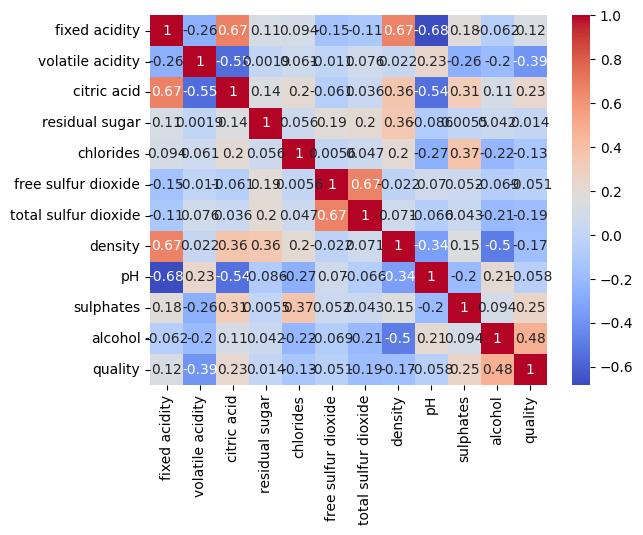

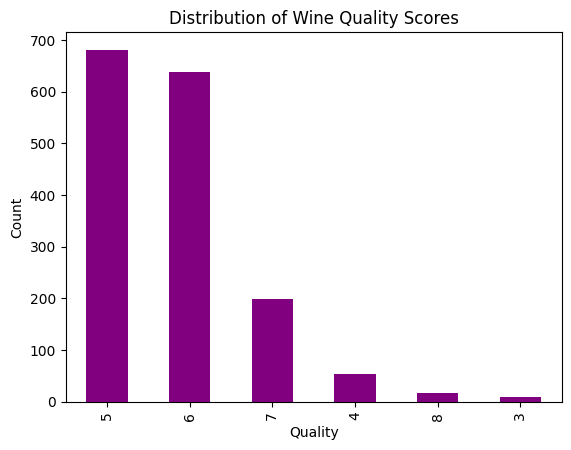

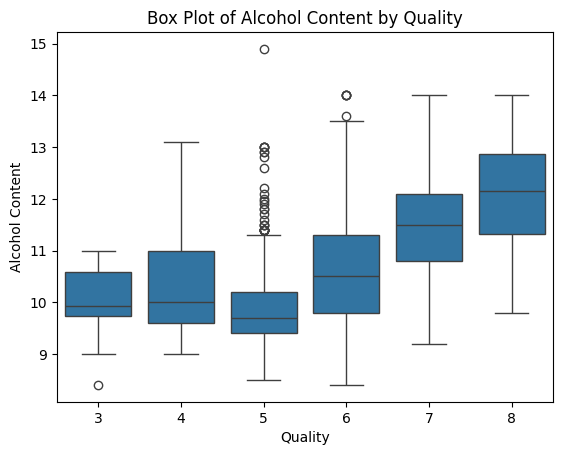

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(wine_data.head())

# Check the basic information about the dataset
print(wine_data.info())

# Check for missing values
print(wine_data.isnull().sum())

# Summary statistics of the dataset
print(wine_data.describe())

# Correlation matrix to understand relationships between features
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribution of quality scores
wine_data['quality'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Scores')
plt.show()

# Box plot to visualize the distribution of alcohol content across different quality levels
sns.boxplot(x='quality', y='alcohol', data=wine_data)
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.title('Box Plot of Alcohol Content by Quality')
plt.show()

In [3]:
from metagpt.tools.libs.data_preprocess import get_column_info

# Using the DataFrame variable from 'Finished Tasks'
column_info = get_column_info(wine_data)
print("column_info")
print(column_info)

column_info
{'Category': [], 'Numeric': ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], 'Datetime': [], 'Others': []}


2025-12-18 23:05:25.400 | INFO     | metagpt.const:get_metagpt_package_root:15 - Package root set to /opt/homebrew/anaconda3/envs/metagpt/lib/python3.10/site-packages
2025-12-18 23:05:25.401 | INFO     | metagpt.const:get_metagpt_package_root:15 - Package root set to /opt/homebrew/anaconda3/envs/metagpt/lib/python3.10/site-packages


In [4]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

# Copy the DataFrame to avoid modifying the original data
wine_data_copy = wine_data.copy()

# Check for and handle missing values if any
if wine_data_copy.isnull().sum().any():
    wine_data_copy.fillna(wine_data_copy.mean(), inplace=True)

# Convert categorical variables to numerical if necessary (e.g., quality column is already ordinal)
# No need to encode or scale the 'quality' column as it's already in an ordinal format

# Split the data into features and target
X = wine_data_copy.drop(columns=['quality'])
y = wine_data_copy['quality']

# Print the shapes of the feature and target datasets
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1599, 11)
Shape of y: (1599,)


In [5]:
from metagpt.tools.libs.data_preprocess import get_column_info

column_info = get_column_info(wine_data_copy)
print("column_info")
print(column_info)

column_info
{'Category': [], 'Numeric': ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], 'Datetime': [], 'Others': []}


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.6438
